In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import KFold
from sklearn.metrics import accuracy_score
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import MinMaxScaler
import matplotlib.pyplot as plt

In [3]:
marketing = pd.read_csv("marketing_numerical.csv")
(marketing.columns.values)

array(['Sex', ' MaritalStatus', ' Age', ' Education', ' Occupation',
       ' YearsInSf', ' DualIncome', ' HouseholdMembers', ' Under18',
       ' HouseholdStatus', ' TypeOfHome', ' EthnicClass', ' Language',
       'Class'], dtype=object)

In [4]:
marketing

,Sex,MaritalStatus,Age,Education,Occupation,YearsInSf,DualIncome,HouseholdMembers,Under18,HouseholdStatus,TypeOfHome,EthnicClass,Language,Class
0,1,1.0,5,5.0,5.0,5.0,3,5.0,2,1.0,1.0,7.0,1.0,9
1,2,1.0,3,5.0,1.0,5.0,2,3.0,1,2.0,3.0,7.0,1.0,9
2,2,5.0,1,2.0,6.0,5.0,1,4.0,2,3.0,1.0,7.0,1.0,1
3,2,5.0,1,2.0,6.0,3.0,1,4.0,2,3.0,1.0,7.0,1.0,1
4,1,1.0,6,4.0,8.0,5.0,3,2.0,0,1.0,1.0,7.0,1.0,8
5,1,5.0,2,3.0,9.0,4.0,1,3.0,1,2.0,3.0,7.0,1.0,1
6,1,3.0,3,4.0,3.0,5.0,1,1.0,0,2.0,3.0,7.0,1.0,6
7,1,1.0,6,3.0,8.0,5.0,3,3.0,0,2.0,3.0,7.0,1.0,2
8,1,1.0,7,4.0,8.0,4.0,3,2.0,0,2.0,3.0,7.0,1.0,4
9,1,5.0,2,4.0,9.0,5.0,1,1.0,0,2.0,3.0,7.0,1.0,1


In [5]:
i = 100
j = 0
features = ['Sex', ' MaritalStatus', ' Age', ' Education', ' Occupation',
       ' YearsInSf', ' DualIncome', ' HouseholdMembers', ' Under18',
       ' HouseholdStatus', ' TypeOfHome', ' EthnicClass', ' Language']
for index, m in marketing.iterrows():
    if index % 20 == 0:
        marketing.at[index+2,features[j]] = i + 1
        j += 3
        i += 10
        if j >= 12:
            j = 0

In [6]:
i = 0
j = 0
for index, m in marketing.iterrows():
    if index % 20 == 0:
        if index < 6870:
            marketing.at[index+5,:] = marketing.loc[j,:]
        else:
            marketing.at[index+1,:] = marketing.loc[j,:]
        j += 120
        if j >= 6500:
            j = 0

In [8]:
marketing.to_csv('marketingNoise.csv', sep=',')

In [9]:
data = marketing.iloc[:,0:13]
labels = marketing.iloc[:,13].apply(str)
labels.unique()

array(['9.0', '1.0', '8.0', '6.0', '2.0', '4.0', '7.0', '5.0', '3.0'],
      dtype=object)

In [11]:
x = data.values.astype(np.float32) #returns a numpy array
min_max_scaler = MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
df = pd.DataFrame(x_scaled)
marketing = pd.concat([df, labels], axis=1)

In [12]:
kf = KFold(n_splits=2, shuffle=True) #5 times with 2 folds

### Euclidean and k tuning on 10% noise datasets

In [13]:
acc = []
mean_accuracy_model_euclidean = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

mean_accuracy_model1 =  sum(acc)/10    
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model1

             precision    recall  f1-score   support

        5.0       0.60      0.59      0.59       629
        8.0       0.19      0.17      0.18       260
        1.0       0.18      0.17      0.18       249
        4.0       0.20      0.19      0.19       299
        7.0       0.16      0.20      0.18       232
        3.0       0.28      0.26      0.27       433
        6.0       0.27      0.25      0.26       409
        2.0       0.34      0.35      0.34       567
        9.0       0.34      0.39      0.37       360

avg / total       0.32      0.32      0.32      3438

accuracy:  0.32431646305991857
             precision    recall  f1-score   support

        5.0       0.62      0.60      0.61       615
        8.0       0.21      0.15      0.17       253
        1.0       0.18      0.20      0.19       237
        4.0       0.16      0.18      0.17       297
        7.0       0.26      0.20      0.23       297
        3.0       0.24      0.24      0.24       436
        6.0

In [14]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model2 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model2

             precision    recall  f1-score   support

        5.0       0.50      0.70      0.59       608
        8.0       0.18      0.19      0.18       257
        1.0       0.15      0.16      0.15       241
        4.0       0.17      0.13      0.15       301
        7.0       0.21      0.15      0.17       260
        3.0       0.25      0.25      0.25       423
        6.0       0.26      0.19      0.22       407
        2.0       0.32      0.35      0.33       557
        9.0       0.41      0.34      0.38       384

avg / total       0.30      0.32      0.31      3438

accuracy:  0.3205351948807446
             precision    recall  f1-score   support

        5.0       0.50      0.74      0.60       636
        8.0       0.16      0.16      0.16       256
        1.0       0.16      0.14      0.15       245
        4.0       0.16      0.14      0.14       295
        7.0       0.16      0.12      0.14       269
        3.0       0.27      0.24      0.25       446
        6.0 

In [15]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model3 = sum(acc)/10 
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model3

             precision    recall  f1-score   support

        5.0       0.50      0.78      0.61       601
        8.0       0.17      0.14      0.16       249
        1.0       0.20      0.12      0.15       251
        4.0       0.18      0.16      0.17       310
        7.0       0.20      0.16      0.18       286
        3.0       0.25      0.26      0.25       433
        6.0       0.23      0.17      0.20       391
        2.0       0.38      0.38      0.38       571
        9.0       0.38      0.37      0.38       346

avg / total       0.31      0.34      0.31      3438

accuracy:  0.3356602675974404
             precision    recall  f1-score   support

        5.0       0.51      0.72      0.59       643
        8.0       0.18      0.15      0.16       264
        1.0       0.18      0.14      0.16       235
        4.0       0.15      0.12      0.13       286
        7.0       0.20      0.19      0.19       243
        3.0       0.23      0.25      0.24       436
        6.0 

In [16]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model4 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model4

             precision    recall  f1-score   support

        5.0       0.53      0.75      0.62       636
        8.0       0.17      0.17      0.17       242
        1.0       0.20      0.13      0.16       231
        4.0       0.19      0.14      0.16       308
        7.0       0.15      0.10      0.12       273
        3.0       0.21      0.26      0.23       418
        6.0       0.23      0.17      0.20       407
        2.0       0.33      0.38      0.35       554
        9.0       0.41      0.33      0.36       369

avg / total       0.30      0.33      0.31      3438

accuracy:  0.32809773123909247
             precision    recall  f1-score   support

        5.0       0.51      0.73      0.60       608
        8.0       0.20      0.12      0.15       271
        1.0       0.20      0.14      0.16       255
        4.0       0.20      0.22      0.21       288
        7.0       0.18      0.14      0.16       256
        3.0       0.25      0.25      0.25       451
        6.0

In [17]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model5 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model5

             precision    recall  f1-score   support

        5.0       0.53      0.77      0.62       637
        8.0       0.17      0.09      0.12       274
        1.0       0.17      0.11      0.13       239
        4.0       0.18      0.11      0.13       316
        7.0       0.19      0.15      0.16       260
        3.0       0.24      0.25      0.24       433
        6.0       0.18      0.16      0.17       378
        2.0       0.32      0.46      0.38       525
        9.0       0.46      0.33      0.38       376

avg / total       0.30      0.33      0.31      3438

accuracy:  0.33304246655031994
             precision    recall  f1-score   support

        5.0       0.49      0.73      0.58       607
        8.0       0.17      0.11      0.13       239
        1.0       0.18      0.09      0.12       247
        4.0       0.20      0.18      0.19       280
        7.0       0.22      0.12      0.15       269
        3.0       0.22      0.27      0.24       436
        6.0

In [18]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model6 = sum(acc)/10
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model6

             precision    recall  f1-score   support

        5.0       0.51      0.80      0.62       624
        8.0       0.18      0.14      0.16       234
        1.0       0.17      0.10      0.13       242
        4.0       0.22      0.15      0.18       300
        7.0       0.11      0.04      0.06       259
        3.0       0.23      0.28      0.25       414
        6.0       0.22      0.13      0.17       414
        2.0       0.31      0.43      0.36       576
        9.0       0.40      0.31      0.35       375

avg / total       0.30      0.33      0.30      3438

accuracy:  0.33420593368237345
             precision    recall  f1-score   support

        5.0       0.50      0.77      0.61       620
        8.0       0.13      0.06      0.09       279
        1.0       0.18      0.07      0.10       244
        4.0       0.21      0.17      0.19       296
        7.0       0.16      0.11      0.13       270
        3.0       0.22      0.26      0.24       455
        6.0

In [19]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model7 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model7

             precision    recall  f1-score   support

        5.0       0.48      0.83      0.61       601
        8.0       0.19      0.10      0.13       254
        1.0       0.16      0.09      0.12       222
        4.0       0.24      0.12      0.16       309
        7.0       0.13      0.04      0.06       255
        3.0       0.22      0.29      0.25       441
        6.0       0.17      0.08      0.11       413
        2.0       0.31      0.47      0.38       562
        9.0       0.40      0.31      0.35       381

avg / total       0.28      0.33      0.29      3438

accuracy:  0.3298429319371728
             precision    recall  f1-score   support

        5.0       0.52      0.78      0.62       643
        8.0       0.12      0.04      0.06       259
        1.0       0.23      0.08      0.12       264
        4.0       0.20      0.19      0.20       287
        7.0       0.20      0.07      0.10       274
        3.0       0.22      0.25      0.23       428
        6.0 

In [20]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model8 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model8

             precision    recall  f1-score   support

        5.0       0.52      0.81      0.63       634
        8.0       0.14      0.04      0.06       262
        1.0       0.20      0.08      0.12       231
        4.0       0.19      0.10      0.13       312
        7.0       0.07      0.04      0.05       255
        3.0       0.20      0.34      0.25       420
        6.0       0.18      0.03      0.06       420
        2.0       0.30      0.50      0.37       538
        9.0       0.41      0.32      0.36       366

avg / total       0.28      0.33      0.28      3438

accuracy:  0.32722513089005234
             precision    recall  f1-score   support

        5.0       0.47      0.82      0.60       610
        8.0       0.17      0.04      0.06       251
        1.0       0.32      0.03      0.05       255
        4.0       0.21      0.22      0.22       284
        7.0       0.17      0.02      0.04       274
        3.0       0.24      0.20      0.22       449
        6.0

In [21]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'euclidean')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)

        
mean_accuracy_model9 = sum(acc)/10  
mean_accuracy_model_euclidean.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model9

             precision    recall  f1-score   support

        5.0       0.51      0.83      0.63       635
        8.0       0.15      0.03      0.05       258
        1.0       0.18      0.02      0.04       253
        4.0       0.17      0.25      0.20       285
        7.0       0.09      0.01      0.02       243
        3.0       0.21      0.18      0.20       438
        6.0       0.14      0.05      0.08       409
        2.0       0.27      0.49      0.35       557
        9.0       0.36      0.36      0.36       360

avg / total       0.27      0.32      0.27      3438

accuracy:  0.32431646305991857
             precision    recall  f1-score   support

        5.0       0.47      0.80      0.59       609
        8.0       0.19      0.01      0.02       255
        1.0       0.31      0.03      0.06       233
        4.0       0.23      0.09      0.13       311
        7.0       0.14      0.02      0.04       286
        3.0       0.20      0.32      0.25       431
        6.0

[0.31198371146015125, 0.3273414776032577, 0.3285049447353113, 0.32993019197207685, 0.33295520651541594, 0.3285922047702153, 0.3320826061663758, 0.32675974403723096, 0.32536358347876676]


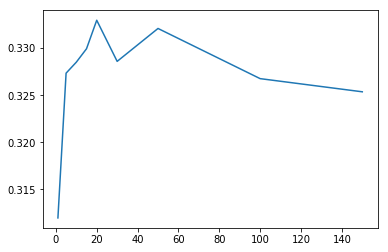

In [22]:
print mean_accuracy_model_euclidean
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()

### Minkowski and k tuning on 10% noise dataset

In [23]:
acc = []
mean_accuracy_model_minkowski = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=1, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model10 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model10

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.61      0.56      0.58       658
        8.0       0.15      0.18      0.17       241
        1.0       0.18      0.17      0.17       240
        4.0       0.15      0.16      0.16       281
        7.0       0.20      0.19      0.19       256
        3.0       0.27      0.27      0.27       430
        6.0       0.24      0.23      0.23       386
        2.0       0.35      0.36      0.36       577
        9.0       0.30      0.33      0.32       369

avg / total       0.32      0.31      0.32      3438

accuracy:  0.3126817917393834
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.59      0.62      0.60       586
        8.0       0.19      0.16      0.17       272
        1.0       0.16      0.17      0.16       246
        4.0       0.14      0.11 

In [24]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=5, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model11 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model11

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.52      0.73      0.61       639
        8.0       0.19      0.18      0.19       256
        1.0       0.18      0.19      0.18       244
        4.0       0.17      0.13      0.15       318
        7.0       0.21      0.18      0.20       266
        3.0       0.27      0.25      0.26       436
        6.0       0.24      0.22      0.23       380
        2.0       0.33      0.39      0.36       528
        9.0       0.46      0.26      0.33       371

avg / total       0.32      0.33      0.32      3438

accuracy:  0.3333333333333333
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.50      0.72      0.59       605
        8.0       0.16      0.18      0.17       257
        1.0       0.14      0.12      0.13       242
        4.0       0.14      0.13 

In [25]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=10, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model12 = sum(acc)/10 
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model12

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.52      0.75      0.61       629
        8.0       0.16      0.10      0.13       263
        1.0       0.13      0.12      0.13       218
        4.0       0.15      0.13      0.14       290
        7.0       0.15      0.10      0.12       268
        3.0       0.23      0.27      0.25       431
        6.0       0.22      0.17      0.19       396
        2.0       0.34      0.39      0.36       560
        9.0       0.43      0.32      0.37       383

avg / total       0.30      0.32      0.30      3438

accuracy:  0.32344386271087844
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.52      0.75      0.61       615
        8.0       0.17      0.16      0.17       250
        1.0       0.20      0.11      0.14       268
        4.0       0.20      0.19

In [26]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=15, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model11 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model11

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.49      0.74      0.59       609
        8.0       0.16      0.12      0.13       268
        1.0       0.12      0.08      0.10       243
        4.0       0.17      0.16      0.17       293
        7.0       0.19      0.10      0.13       260
        3.0       0.22      0.26      0.24       432
        6.0       0.21      0.11      0.15       409
        2.0       0.34      0.41      0.37       556
        9.0       0.36      0.32      0.34       368

avg / total       0.28      0.31      0.29      3438

accuracy:  0.31297265852239675
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.52      0.76      0.62       635
        8.0       0.17      0.12      0.14       245
        1.0       0.19      0.11      0.14       243
        4.0       0.19      0.16

In [27]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=20, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model13 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model13

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.53      0.78      0.63       632
        8.0       0.19      0.18      0.18       238
        1.0       0.20      0.14      0.16       247
        4.0       0.18      0.12      0.14       321
        7.0       0.16      0.10      0.13       263
        3.0       0.20      0.20      0.20       449
        6.0       0.22      0.14      0.17       390
        2.0       0.31      0.44      0.36       527
        9.0       0.43      0.34      0.38       371

avg / total       0.30      0.33      0.31      3438

accuracy:  0.3307155322862129
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.51      0.76      0.61       612
        8.0       0.19      0.10      0.13       275
        1.0       0.19      0.10      0.13       239
        4.0       0.17      0.19 

In [28]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=30, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model14 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model14

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.51      0.77      0.62       617
        8.0       0.22      0.16      0.19       244
        1.0       0.21      0.08      0.12       243
        4.0       0.20      0.12      0.15       311
        7.0       0.16      0.06      0.08       284
        3.0       0.21      0.29      0.25       428
        6.0       0.21      0.14      0.17       402
        2.0       0.31      0.45      0.37       543
        9.0       0.41      0.35      0.38       366

avg / total       0.30      0.33      0.30      3438

accuracy:  0.33187899941826643
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.50      0.79      0.61       627
        8.0       0.14      0.06      0.09       269
        1.0       0.18      0.13      0.15       243
        4.0       0.19      0.18

In [29]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=50, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model15 = sum(acc)/10 
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model15

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.48      0.80      0.60       615
        8.0       0.18      0.10      0.13       232
        1.0       0.20      0.08      0.12       238
        4.0       0.21      0.14      0.17       300
        7.0       0.12      0.06      0.08       259
        3.0       0.21      0.24      0.23       446
        6.0       0.18      0.10      0.13       415
        2.0       0.32      0.47      0.39       559
        9.0       0.43      0.35      0.39       374

avg / total       0.29      0.33      0.29      3438

accuracy:  0.33013379872018617
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.52      0.83      0.64       629
        8.0       0.14      0.04      0.06       281
        1.0       0.21      0.10      0.14       248
        4.0       0.21      0.15

In [30]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=100, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model16 = sum(acc)/10  
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model16

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.50      0.81      0.62       612
        8.0       0.16      0.07      0.10       244
        1.0       0.14      0.03      0.05       242
        4.0       0.21      0.12      0.15       310
        7.0       0.15      0.01      0.03       289
        3.0       0.22      0.30      0.25       435
        6.0       0.17      0.07      0.10       390
        2.0       0.28      0.57      0.37       529
        9.0       0.42      0.24      0.30       387

avg / total       0.28      0.32      0.27      3438

accuracy:  0.3237347294938918
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.50      0.83      0.62       632
        8.0       0.16      0.03      0.04       269
        1.0       0.24      0.06      0.09       244
        4.0       0.21      0.16 

In [31]:
acc = []
for i in range(5):
    for train_index, test_index in kf.split(marketing):
        X_train, X_test = data.iloc[train_index], data.iloc[test_index]
        y_train, y_test = labels[train_index], labels[test_index]
        all_labels = pd.concat([y_train, y_test], axis=0)
        knn = KNeighborsClassifier(n_neighbors=150, algorithm = 'auto', metric = 'minkowski')
        knn.fit(X_train, y_train)
        predicted = knn.predict(X_test)
        if len(set(predicted)) == len(set(y_test)):
            unique_labels = set(predicted)
            print unique_labels
        elif len(set(predicted)) < len(set(y_test)):
            unique_labels = set(y_test)
        else :
            unique_labels = set(predicted)
        print classification_report(y_test, predicted, target_names=unique_labels)
        acc.append(accuracy_score(y_test, predicted))
        print "accuracy: ", accuracy_score(y_test, predicted)
        
mean_accuracy_model17 = sum(acc)/10
mean_accuracy_model_minkowski.append(sum(acc)/10)
print "mean accuracy", mean_accuracy_model17

set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.48      0.82      0.60       615
        8.0       0.17      0.02      0.03       252
        1.0       0.36      0.04      0.07       239
        4.0       0.22      0.19      0.20       300
        7.0       0.19      0.04      0.06       266
        3.0       0.23      0.28      0.25       437
        6.0       0.23      0.07      0.10       392
        2.0       0.29      0.60      0.39       541
        9.0       0.50      0.28      0.36       396

avg / total       0.31      0.34      0.28      3438

accuracy:  0.33973240255962767
set(['5.0', '8.0', '1.0', '4.0', '7.0', '3.0', '6.0', '2.0', '9.0'])
             precision    recall  f1-score   support

        5.0       0.49      0.82      0.62       629
        8.0       0.03      0.00      0.01       261
        1.0       0.14      0.02      0.04       247
        4.0       0.25      0.13

[0.31157649796393255, 0.3295520651541594, 0.3301628853984876, 0.3272542175683537, 0.32908667830133803, 0.32934845840605004, 0.3281849912739965, 0.3275741710296684, 0.3260907504363002]


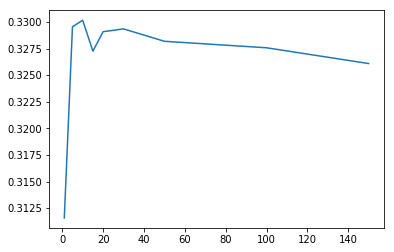

In [32]:
print mean_accuracy_model_minkowski
k = [1, 5, 10, 15, 20, 30, 50, 100, 150]
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
plt.show()

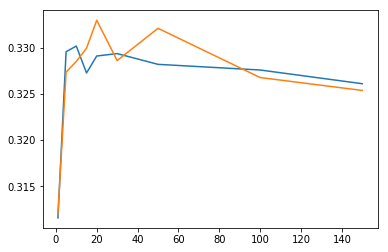

In [33]:
fig = plt.figure()
ax = plt.axes()
ax.plot(k, mean_accuracy_model_minkowski)
ax.plot(k, mean_accuracy_model_euclidean)
plt.show()